In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
data4 = xr.open_dataset("PSI_non_dim_full_form_visc_low_res_b.nc")

In [3]:
N_list = [(1*10**(-5))**(0.5)]  # np.linspace((1e-7)**(0.5),(8e-4)**(0.5),51)  # np.array([(1e-5)**(0.5)])  # stratification
theta = 5*10**(-3)
delta_list = [0.5]  # np.linspace(0, 1, 26)
f = 10**(-4)
S2 = N_list[0]**2*theta**2/f**2
gm = (1+S2)**(-1)
beta = (1 + S2)**(-0.5)

In [4]:
def vsz(t):
    return 1 + beta**(-2)*(np.cos(beta*t)-1)

In [5]:
def usz(t):
    return beta**(-1)*(np.sin(beta*t))

In [42]:
data4.t

<xarray.DataArray 't' (t: 6)>
array([0.      , 0.883293, 1.766585, 2.649878, 3.533171, 4.416463])
Coordinates:
  * t        (t) float64 0.0 0.8833 1.767 2.65 3.533 4.416

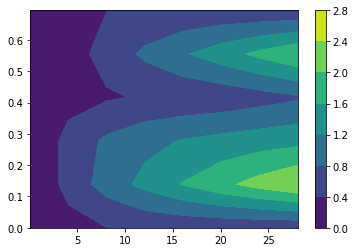

In [39]:
plt.contourf(data4.k,data4.t*beta/(2*np.pi), data4.growth_rate.isel(N=0, delta=0, gamma_index=0))
plt.colorbar()

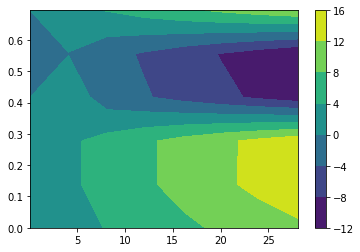

In [41]:
plt.contourf(data4.k,data4.t*beta/(2*np.pi), data4.oscillation.isel(N=0, delta=0, gamma_index=0))
plt.colorbar()

Text(0, 0.5, 'Growth Rate')

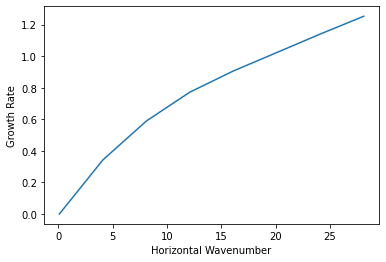

In [9]:
plt.plot(data4.k, data4.growth_rate.isel(N=0, delta=0, gamma_index=0).mean(['t']))
plt.xlabel("Horizontal Wavenumber")
plt.ylabel("Growth Rate")

In [10]:
data4.growth_rate.isel(N=0, delta=0, gamma_index=0).max(dim="k")

<xarray.DataArray 'growth_rate' (t: 6)>
array([0.47874602, 2.40079492, 1.48117519, 0.7489446 , 1.96425199,
       0.47966265])
Coordinates:
  * t            (t) float64 0.0 0.8833 1.767 2.65 3.533 4.416
    N            float64 0.003162
    delta        float64 0.5
    gamma_index  float64 0.0

In [11]:
idx = data4.growth_rate.isel(N=0, delta=0, gamma_index=0).idxmax(dim="k")
# idx = data4.growth_rate.isel(N=0, delta=0, gamma_index=0).mean(['t']).idxmax(dim="k")

# data4.growth_rate.isel(N=0, delta=0, gamma_index=0).sel(k=idx)

# idx = np.unique(idx[idx <= 15])
# idx =  data4.k
# idx = idx[-1:]

In [12]:
idx

<xarray.DataArray 'k' (t: 6)>
array([20.1, 28.1, 28.1, 28.1, 28.1, 20.1])
Coordinates:
    N            float64 0.003162
    delta        float64 0.5
    gamma_index  float64 0.0
  * t            (t) float64 0.0 0.8833 1.767 2.65 3.533 4.416

In [13]:
data5 = xr.open_dataset("PSI_non_dim_field_low_res_b.nc")

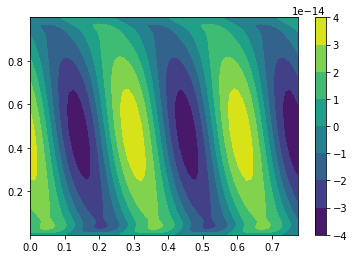

In [20]:
q = 0
i = idx[q]
x_domain = np.linspace(0, 2*np.pi/8.1, 64)
omega_r = data4.growth_rate.isel(N=0, delta=0, gamma_index=0, t=q).sel(k=i)
omega_i = data4.oscillation.isel(N=0, delta=0, gamma_index=0, t=q).sel(k=i)
v_z = data5.v_structure.isel(t=q).sel(k=i)
p_s = np.cos(np.array(i)*x_domain-np.array(omega_r)*np.array(data5.t[q]))*np.exp(np.array(omega_i)*np.array(data5.t[q]))
p_s2 = np.sin(np.array(i)*x_domain-np.array(omega_r)*np.array(data5.t[q]))*np.exp(np.array(omega_i)*np.array(data5.t[q]))
total = np.array([data5.v_structure.isel(t=q).sel(k=i)]).T*np.array([p_s])+np.array([data5.v_structure_complex.isel(t=q).sel(k=i)]).T*np.array([p_s2])
plt.contourf(np.array(x_domain), np.array(data5.z), total)
plt.colorbar()

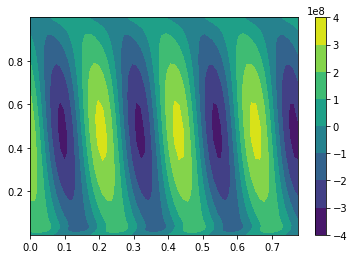

In [26]:
q = 5
# i = idx[q]
x_domain = np.linspace(0, 2*np.pi/8.1, 64)
total_t = np.zeros((64, 64))
for i in idx:
    omega_r = data4.growth_rate.isel(N=0, delta=0, gamma_index=0, t=q).sel(k=i)
    omega_i = data4.oscillation.isel(N=0, delta=0, gamma_index=0, t=q).sel(k=i)
    v_z = data5.v_structure.isel(t=q).sel(k=i)
    p_s = np.cos(np.array(i)*x_domain-np.array(omega_r)*np.array(data5.t[q]))*np.exp(np.array(omega_i)*np.array(data5.t[q]))
    p_s2 = np.sin(np.array(i)*x_domain-np.array(omega_r)*np.array(data5.t[q]))*np.exp(np.array(omega_i)*np.array(data5.t[q]))
    total = np.array([data5.v_structure.isel(t=q).sel(k=i)]).T*np.array([p_s])+np.array([data5.v_structure_complex.isel(t=q).sel(k=i)]).T*np.array([p_s2])
    total_t += total
plt.contourf(np.array(x_domain), np.array(data5.z), total_t)
plt.colorbar()

In [27]:
data5.z

<xarray.DataArray 'z' (z: 64)>
array([1.505907e-04, 1.354772e-03, 3.760233e-03, 7.361179e-03, 1.214893e-02,
       1.811197e-02, 2.523591e-02, 3.350360e-02, 4.289512e-02, 5.338785e-02,
       6.495650e-02, 7.757322e-02, 9.120759e-02, 1.058268e-01, 1.213956e-01,
       1.378765e-01, 1.552297e-01, 1.734136e-01, 1.923842e-01, 2.120959e-01,
       2.325012e-01, 2.535509e-01, 2.751943e-01, 2.973793e-01, 3.200525e-01,
       3.431591e-01, 3.666436e-01, 3.904494e-01, 4.145191e-01, 4.387947e-01,
       4.632177e-01, 4.877294e-01, 5.122706e-01, 5.367823e-01, 5.612053e-01,
       5.854809e-01, 6.095506e-01, 6.333564e-01, 6.568409e-01, 6.799475e-01,
       7.026207e-01, 7.248057e-01, 7.464491e-01, 7.674988e-01, 7.879041e-01,
       8.076158e-01, 8.265864e-01, 8.447703e-01, 8.621235e-01, 8.786044e-01,
       8.941732e-01, 9.087924e-01, 9.224268e-01, 9.350435e-01, 9.466122e-01,
       9.571049e-01, 9.664964e-01, 9.747641e-01, 9.818880e-01, 9.878511e-01,
       9.926388e-01, 9.962398e-01, 9.986452e-01, 9.998494e-01])
Coordinates:
  * z        (z) float64 0.0001506 0.001355 0.00376 ... 0.9962 0.9986 0.9998

In [28]:
np.shape(total)

(64, 64)

In [29]:
np.shape(np.array(x_domain))

(64,)

In [30]:
np.shape(x_domain)

(64,)

/var/folders/n0/rsxpkn6j2xv8hrpk19m6_r6m0000gn/T/ipykernel_67348/1692155052.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(data5.z, data5.t*beta/(2*np.pi), data5.v_structure.isel(k=-1)/data5.v_structure.isel(k=-1).max())  # f/theta*S2*data5.z background shear


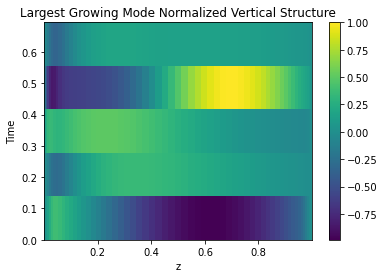

In [38]:
plt.pcolormesh(data5.z, data5.t*beta/(2*np.pi), data5.v_structure.isel(k=-1)/data5.v_structure.isel(k=-1).max())  # f/theta*S2*data5.z background shear
plt.ylabel("Time")
plt.xlabel("z")
plt.title("Largest Growing Mode Normalized Vertical Structure")
plt.colorbar()
# plt.xlabel("v-velocity")

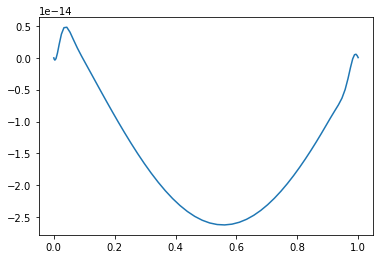

In [37]:
plt.plot(data5.z, data5.v_structure.isel(k=-1,t=5))

In [ ]:
plt.pcolormesh(data5.z, data5.t*beta/(2*np.pi), data5.v_structure.isel(k=-1)+data5.z-0.9*vsz(data5.t)*(1-data5.z))  # f/theta*S2*data5.z background shear
plt.ylabel("Time")
plt.colorbar()
# plt.xlabel("v-velocity")

In [ ]:
data5.v_structure.isel(k=14)